In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/My Drive/assignment/dataset")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Diabetic prediction using Deep neural networks**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.shape

(768, 9)

 The dataset has 768 rows and 9 columns.
 This dataset is obtained from [kaggle](https://www.kaggle.com/datasets/mathchi/diabetes-data-set). The original source of the data set comes from ['national institute of diabetes and digestive and kidney diseases'](https://www.niddk.nih.gov/) part of US national institute of health.(). 

The data sample is specific to the pima-indian people in Arizona. All patients are females. Pima people are a homogenous group with highest prevalance of type-2 diabetis [pima people](https://en.wikipedia.org/wiki/Pima_people)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Each row consists of the information of 8 features which are physiological parameters, age and number of pregnancies. There is another target variable(outcome) that classifies if a parient has diabetis or not. 

The independent features are

1. Pregnancies: number of times a patient was pregnent.
2. Glucose: Blood glucose levels measured within two hours of oral glucose ingestion
3. BloodPressure: pressure in arteries between heart beats(Diastolic B.P)(mm HG)
4. SkinThickness: The triceps skin thickness measured in millimeters
5. Insulin: insulin harmon levels in serum (mu U/ml)
6. BMI: body mass index (weight/height square)Kg/squre-meter
7. DiabetesPedigreeFunction: a function that eveluates the risk of type-2 diabetis based on family history.
8. Age: age in years

In [ ]:
df.Outcome.unique()

array([1, 0])

The outcome(dependent variable) is a binary target variable with 1 indicating that a patient is tested positive and 0 indicating that a patient is tested negitive for diabetis

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The data types of all features are numbers with type integer or floot.

### **sample data**

In [ ]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
752,3,108,62,24,0,26.0,0.223,25,0
516,9,145,88,34,165,30.3,0.771,53,1
577,2,118,80,0,0,42.9,0.693,21,1
692,2,121,70,32,95,39.1,0.886,23,0


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The dataset have no missing values.

## **Sample distribution**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

[]

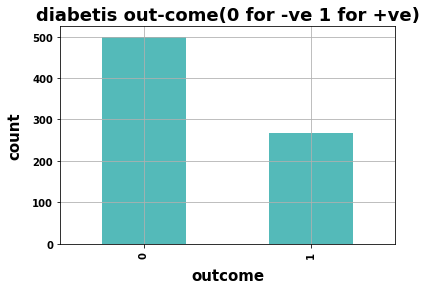

In [ ]:
df['Outcome'].value_counts().plot(kind = 'bar', color = '#54BAB9')
plt.grid('on')
plt.title("diabetis out-come(0 for -ve 1 for +ve)", fontsize=18, weight = 'bold')
plt.xlabel('outcome', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('count', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()

In [ ]:
df['Outcome'].value_counts()[1]/df.shape[0] * 100

34.89583333333333

we see that the data set is imbalanced with only 35% of the patients tested +ve for diabetis.

In [ ]:
for column in df.columns:
  print(column,':', 'min:', df[column].min(), 'max:', df[column].max())

Pregnancies : min: 0 max: 17
Glucose : min: 0 max: 199
BloodPressure : min: 0 max: 122
SkinThickness : min: 0 max: 99
Insulin : min: 0 max: 846
BMI : min: 0.0 max: 67.1
DiabetesPedigreeFunction : min: 0.078 max: 2.42
Age : min: 21 max: 81
Outcome : min: 0 max: 1


**The range of values of each feature is shown above. Looking at these values we see some of these are absurd values. <br>
For example zero blodPressure, thickness, Insulin, BMI doesnt make any sense.**
This indicate that 0 values in some of these features are wrong values and needs to be investigated.

### **Lets understand the univariate feature distribution**

## **1. Pregnancies**

In [ ]:
import matplotlib
import seaborn as sns

[]

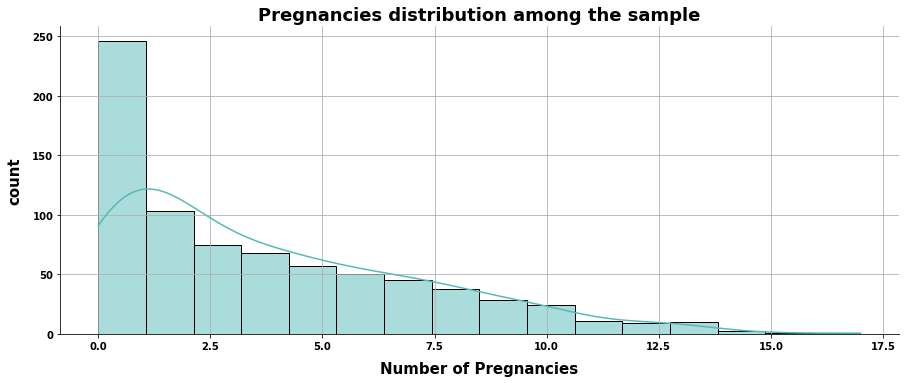

In [ ]:
sns.displot(data = df, x = 'Pregnancies', color = '#54BAB9', height =5, aspect = 2.5, kde = True)
plt.grid('on')
plt.title("Pregnancies distribution among the sample", fontsize=18, weight = 'bold')
plt.xlabel('Number of Pregnancies', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('count', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()

In [ ]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

**From the distribution of the Pregnancy history. we see that many of the subjects have no pregnancy history. Also the data above indicates that only 4 subjects have more than 12 pregnancies. such samples doesnt represent the majority class.**

In [ ]:
df[["Pregnancies"]].describe().T[['mean', 'std']]

,mean,std
Pregnancies,3.845052,3.369578


**on an average each subject have an average of 3.85 number of pregnancies with a standard deviation of 3.4, this means pregnancies above 12 are more than 3 times the standard deviation and are outliers. Lets check in a box-plot**

[]

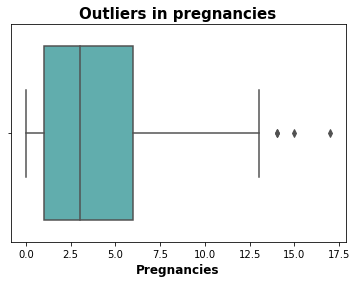

In [ ]:
sns.boxplot(x=df["Pregnancies"], color = '#54BAB9')

plt.title("Outliers in pregnancies", fontsize=15, weight = 'bold')
plt.xlabel('Pregnancies', fontsize=12, weight = 'bold') 
plt.plot()

Outliers are known to affect the performance of neural networks [ref:](https://www.researchgate.net/publication/26568300_The_Effects_of_Outliers_Data_on_Neural_Network_Performance) while the number of outliers are low to bring significant effect on the performance of the neural networks, we shall remove them to make sure we deel with the population not more than 3 standard deviations from the mean. We could mean impute as well but as there are only 3 such samples we can ignore them with little impact on the reduction in the size of the data.

In [ ]:
df[df['Pregnancies'] > 13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [ ]:
df = df[df['Pregnancies'] <= 13]

## **2. Plasma Glucose levels:**
Plasma glucose consentration:
In a glucose tolerance test blood-sugar levels below 140mg/dL is usually considered as normal. According to [CDC](https://www.cdc.gov/diabetes/basics/getting-tested.html#:~:text=A%20fasting%20blood%20sugar%20level,higher%20indicates%20you%20have%20diabetes.) the blood sugar levels in between 140 to 200mg/dL could indicate pre-diabetis and those above 200mg/dL indicate diabetis

[]

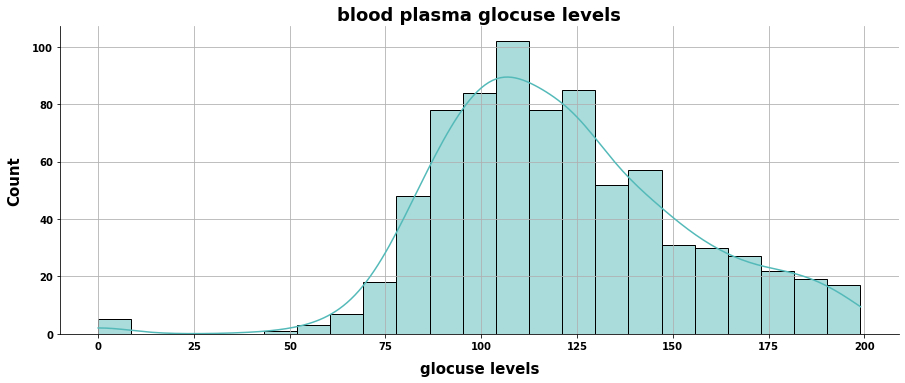

In [ ]:
sns.displot(data = df, x = 'Glucose', color = '#54BAB9', height =5, aspect = 2.5, kde = True)
plt.grid('on')
plt.title("blood plasma glocuse levels", fontsize=18, weight = 'bold')
plt.xlabel('glocuse levels', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('Count', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()


* From the above distribution plot we see that plasma glucose levels are in range from 0 to 200.
* We notice that none of the subjects should have diabetis but are can be in the range of pre-diabetis as defined by CDC.
* Also we see that some samples have low blood suger Hypoglycemia  [levels<70].
* We also see that some patients have 0 levels which seems absurd as such low suger levels are dangerous and can immediately lead to death.

In [ ]:
df[df['Glucose'] <40][['Glucose', 'Outcome']]

,Glucose,Outcome
75,0,0
182,0,0
342,0,0
349,0,1
502,0,1


[]

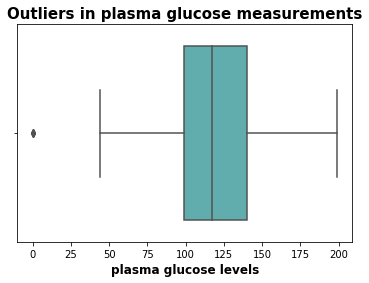

In [ ]:
sns.boxplot(x=df["Glucose"], color = '#54BAB9')
plt.title("Outliers in plasma glucose measurements", fontsize=15, weight = 'bold')
plt.xlabel('plasma glucose levels', fontsize=12, weight = 'bold') 
plt.plot()

we shall impute these 5 samples have 0 levels of plase glucose later. For now we shall replace them with null values.

In [ ]:
df['Glucose'] = df['Glucose'].replace(0,np.nan) 

## **3. Diastolic BloodPressure(mm HG)**

[]

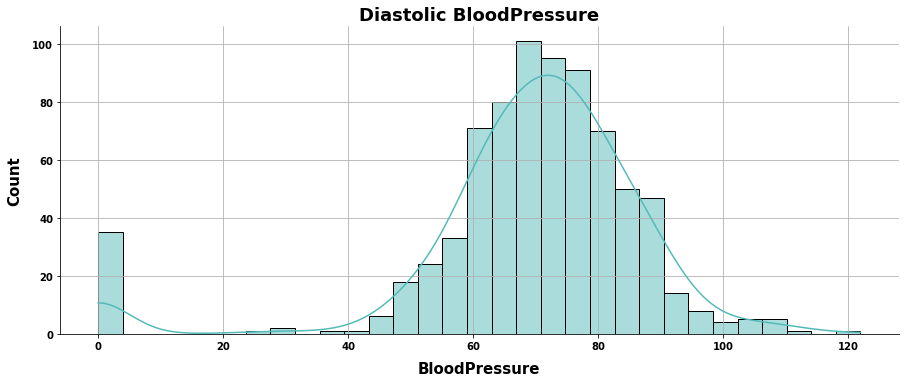

In [ ]:
sns.displot(data = df, x = 'BloodPressure', color = '#54BAB9', height =5, aspect = 2.5, kde = True)
plt.grid('on')
plt.title("Diastolic BloodPressure", fontsize=18, weight = 'bold')
plt.xlabel('BloodPressure', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('Count', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()

again 0 diastolic pressure is absurd we shall impute these values later. For now we replace them with null

In [ ]:
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)

## **Skin Thickness**

[]

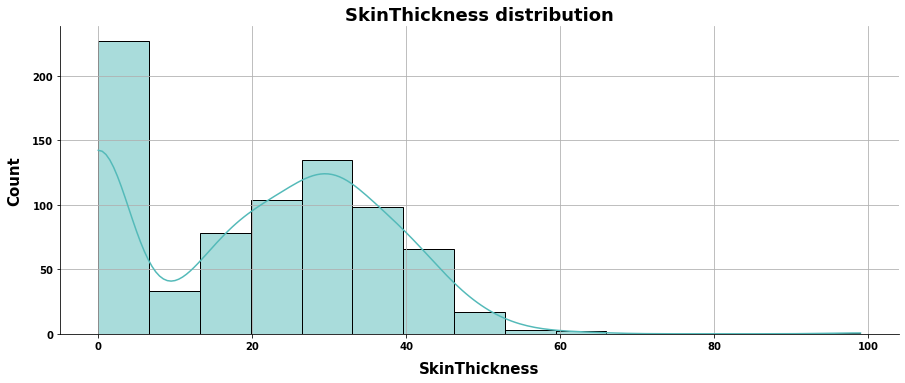

In [ ]:
sns.displot(data = df, x = 'SkinThickness', color = '#54BAB9', height =5, aspect = 2.5, kde = True)
plt.grid('on')
plt.title("SkinThickness distribution", fontsize=18, weight = 'bold')
plt.xlabel('SkinThickness', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('Count', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()

Again the value of skinthickness = 0 which is not possible. This only could mean that data of many patients is missing and has been replaced with 0. we can either remove this column or impute by mean. Rather than removing it now we shall latter impute it and see if it effects a predictive models performance.
For now we use nan insted of zero

In [ ]:
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan) 

## **Insulin**
serum insulin levels in  (mu U/ml).

[]

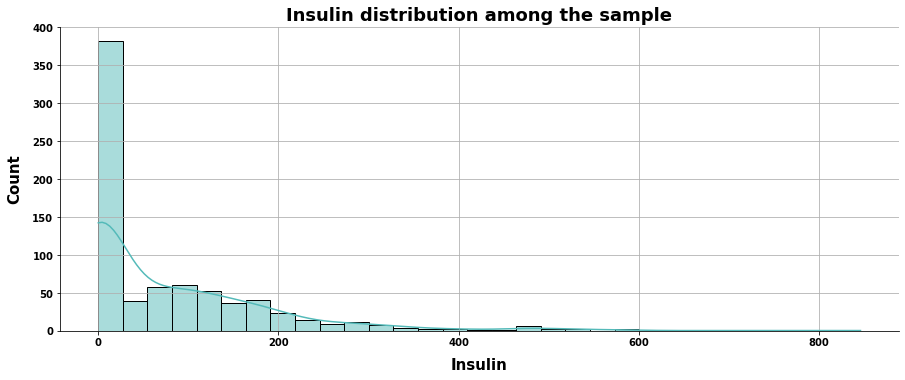

In [ ]:
sns.displot(data = df, x = 'Insulin', color = '#54BAB9', height =5, aspect = 2.5, kde = True)
plt.grid('on')
plt.title("Insulin distribution among the sample", fontsize=18, weight = 'bold')
plt.xlabel('Insulin', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('Count', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()

again replacing 0 values with nan

In [ ]:
df['Insulin'] = df['Insulin'].replace(0,np.nan) 

## **BMI**

[]

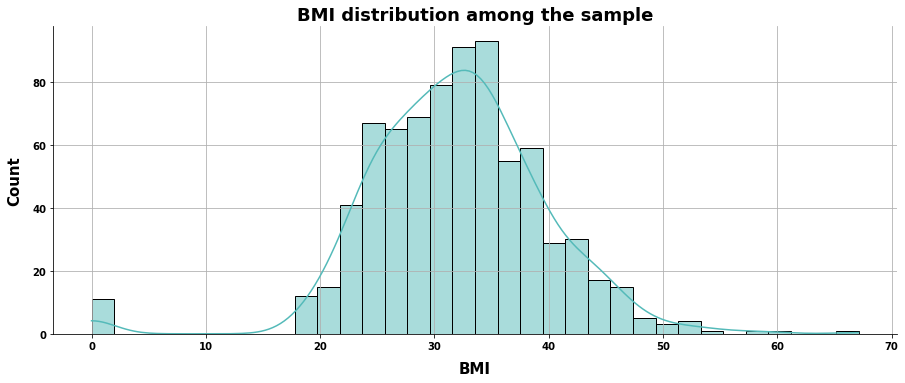

In [ ]:
sns.displot(data = df, x = 'BMI', color = '#54BAB9', height =5, aspect = 2.5, kde = True)
plt.grid('on')
plt.title("BMI distribution among the sample", fontsize=18, weight = 'bold')
plt.xlabel('BMI', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('Count', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()

again replacing 0 values with nan

In [ ]:
df['BMI'] = df['BMI'].replace(0,np.nan)

## **DiabetesPedigreeFunction**

[]

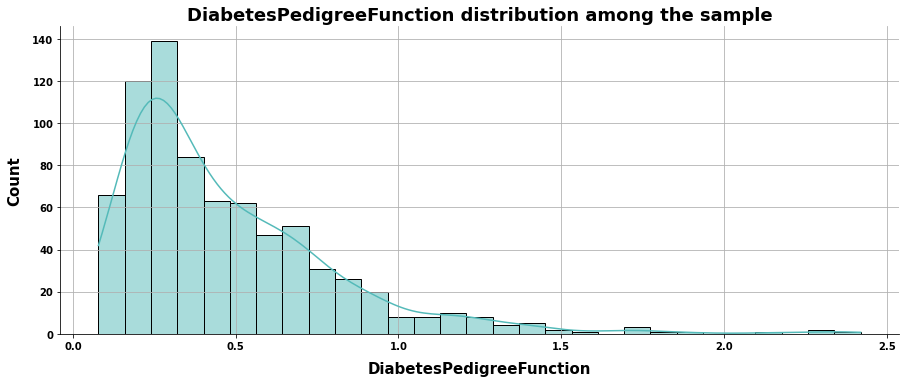

In [ ]:
sns.displot(data = df, x = 'DiabetesPedigreeFunction', color = '#54BAB9', height =5, aspect = 2.5, kde = True)
plt.grid('on')
plt.title("DiabetesPedigreeFunction distribution among the sample", fontsize=18, weight = 'bold')
plt.xlabel('DiabetesPedigreeFunction', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('Count', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()

the distribution is right skewed. This has effect on regression based algorithms performsnce. Usually deep-learning algorithms performance is't significantly impacted by skewed distributions.

[]

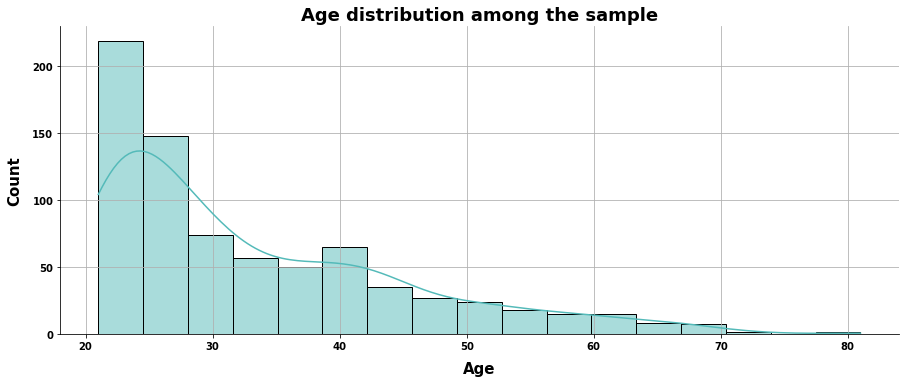

In [ ]:
sns.displot(data = df, x = 'Age', color = '#54BAB9', height =5, aspect = 2.5, kde = True)
plt.grid('on')
plt.title("Age distribution among the sample", fontsize=18, weight = 'bold')
plt.xlabel('Age', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('Count', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()

In [ ]:
print(df['Age'].mean(), df['Age'].std())

33.18717277486911 11.764744759540456


all subjects are of above age of 20 years and with a mean age of 33 years old and SD 11.7

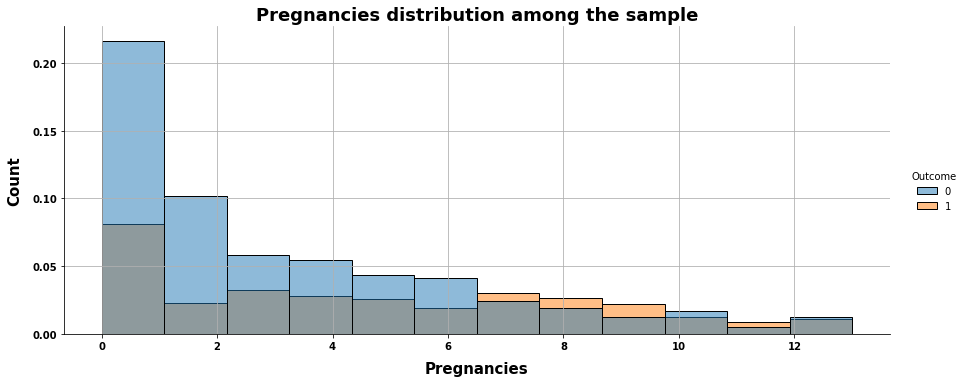

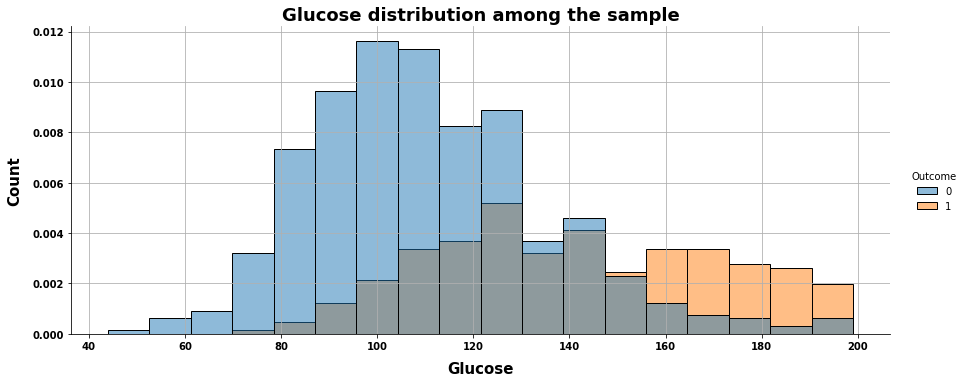

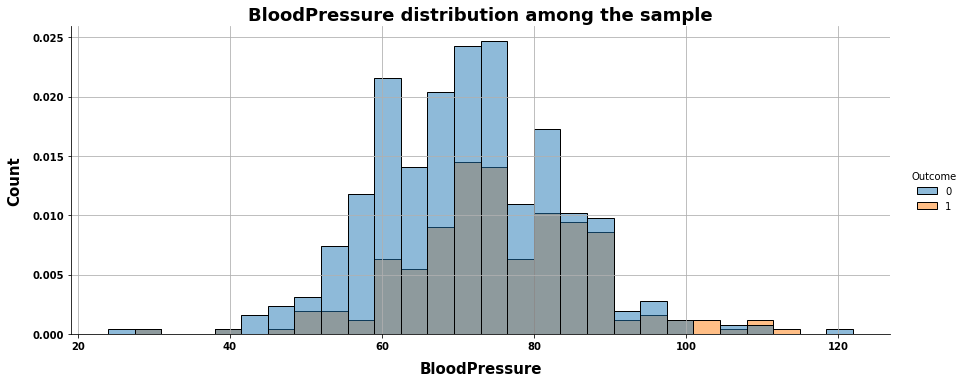

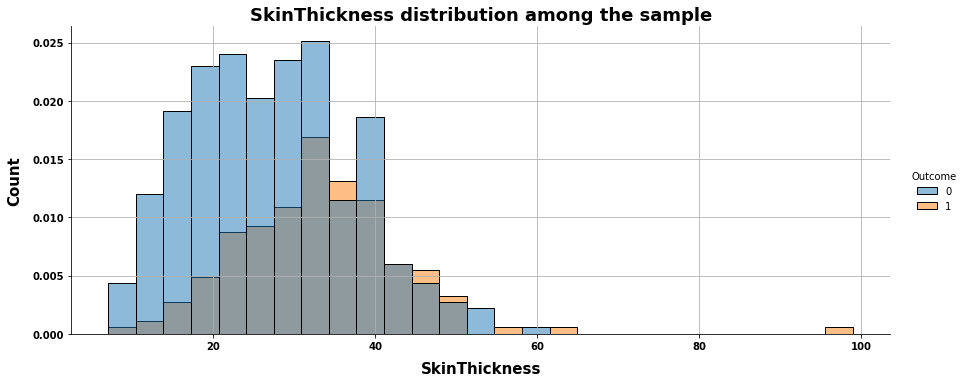

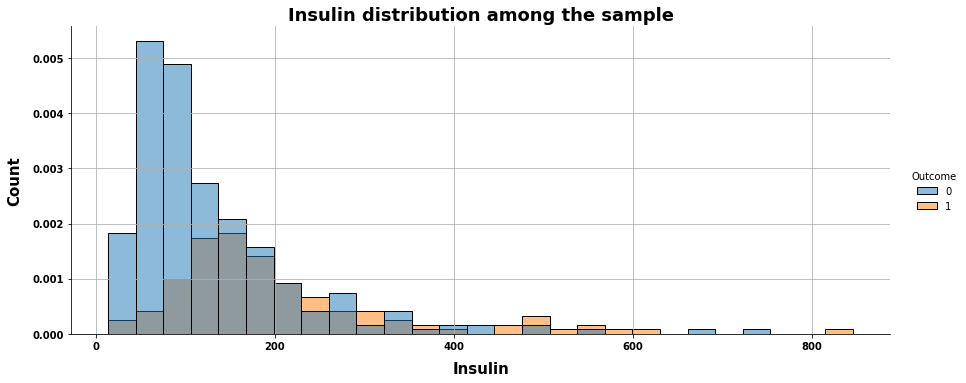

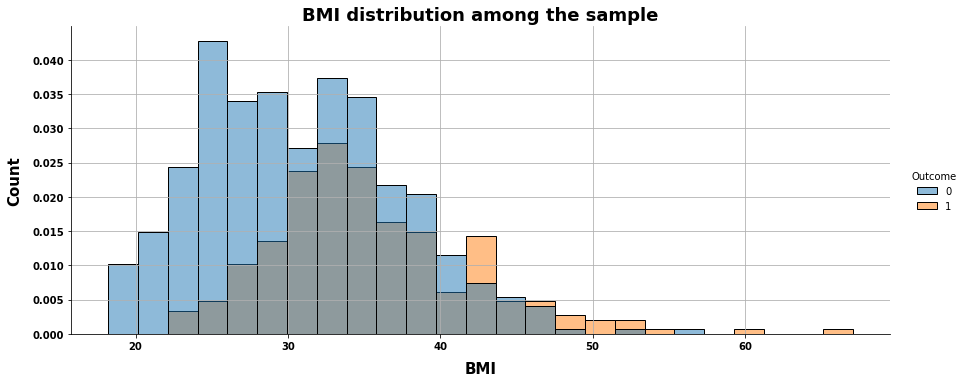

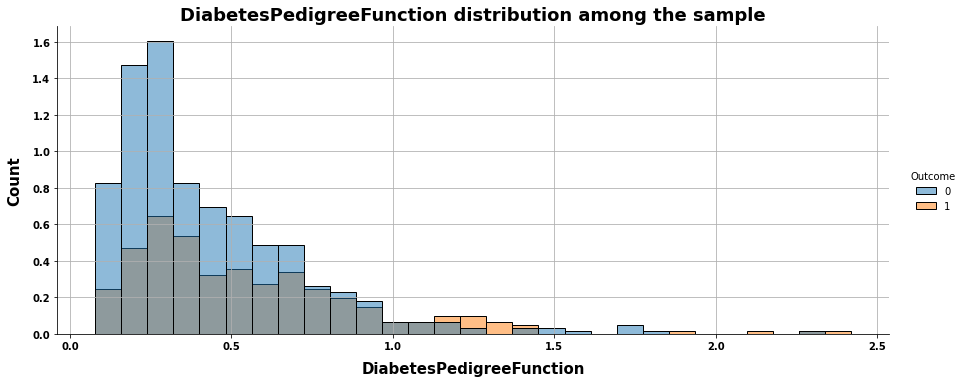

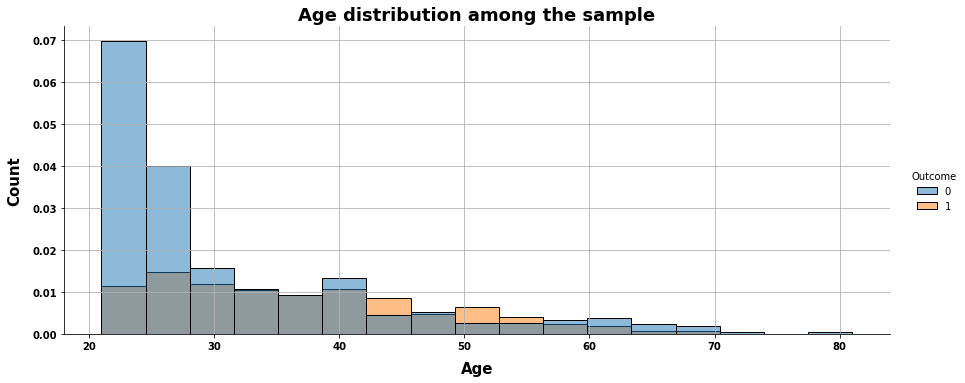

In [ ]:
for column in df.columns:
  if column != 'Outcome':
    sns.displot(data = df, x = column, color = '#54BAB9', height =5, aspect = 2.5, hue = 'Outcome', stat = 'density')
    plt.grid('on')
    plt.title(column+" distribution among the sample", fontsize=18, weight = 'bold')
    plt.xlabel(column, labelpad=10, fontsize=15, weight = 'bold') 
    plt.ylabel('Count', labelpad=10, fontsize=15, weight = 'bold')
    plt.xticks(fontsize=10,weight = 'bold')
    plt.yticks(fontsize=10, weight = 'bold')
    plt.plot()

above are the normalized binomial distribution plots for each feature in the dataset distributed into the binary class of having and not having diabetis.
* from the pregnancies distribution plots we see that pregnancies in range 6-10 are associated with relatively more cases of diabetis.
* glucose levels show distribution with different mean for diabetic and non-diabetic patients.
* Blood pressure, skin-thickness, and insulin-levels binary distribution doesnt show any visible differences.
* As expected we see higher bmi values correspond to diabetic condition as diabetic distribution's mean seems to be shifted right for diabetic patients.
* age and diabetisPedigreeFunction also doesnt indicate much differences.

## **Bivariate distribution**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

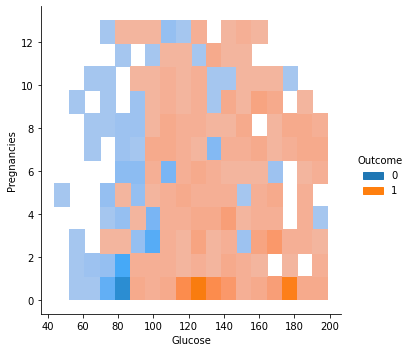

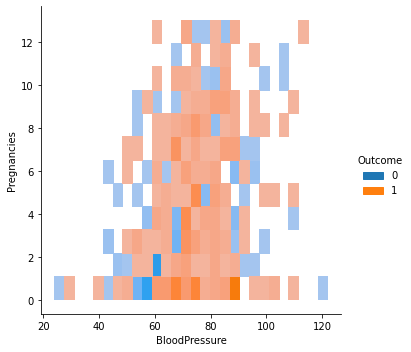

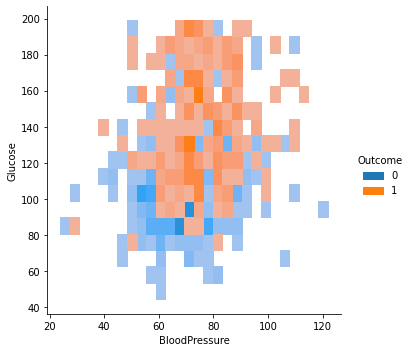

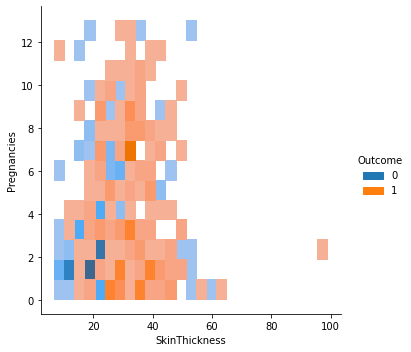

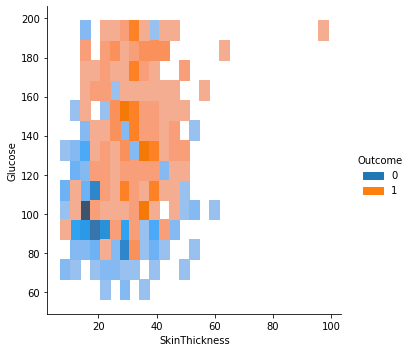

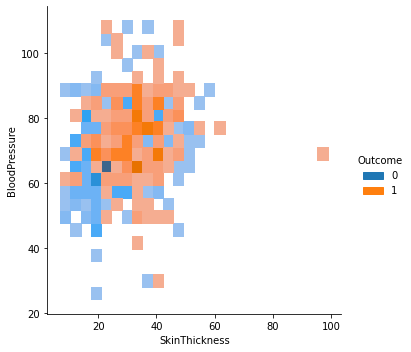

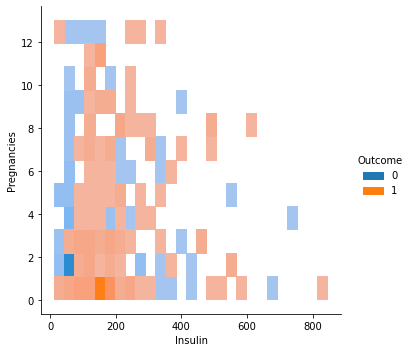

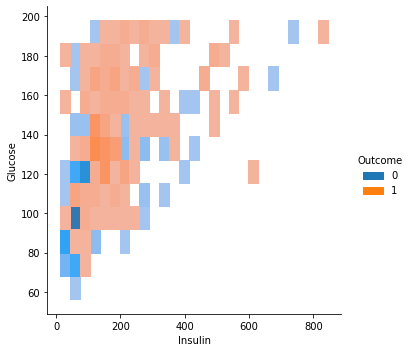

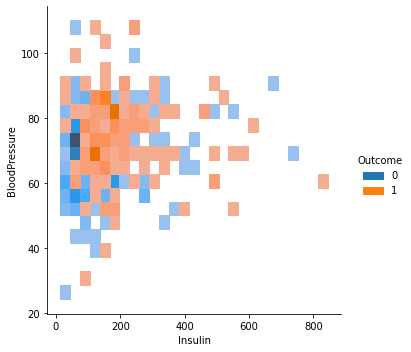

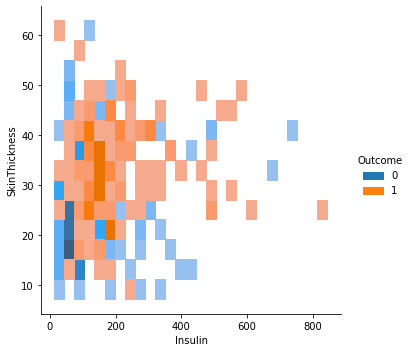

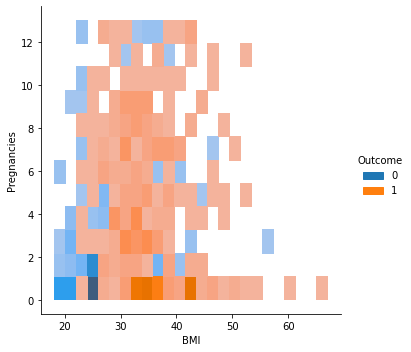

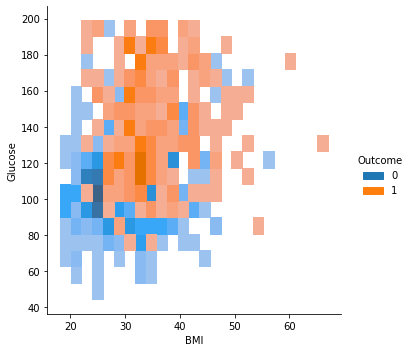

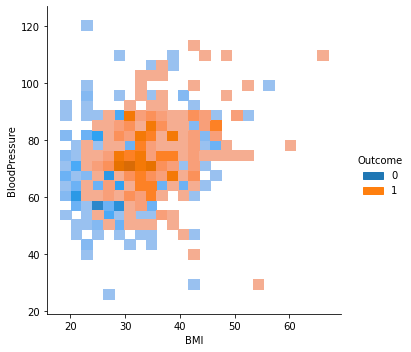

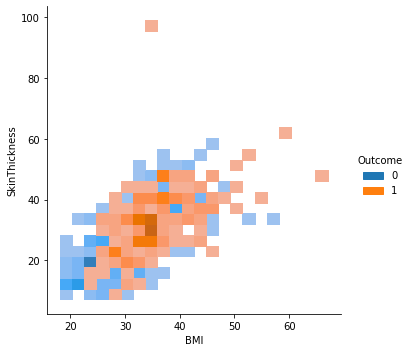

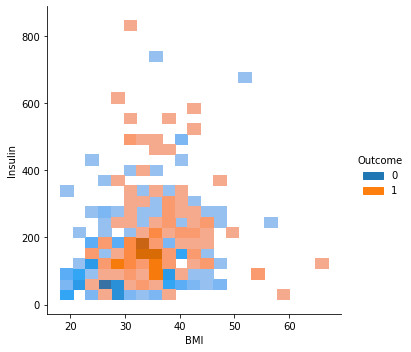

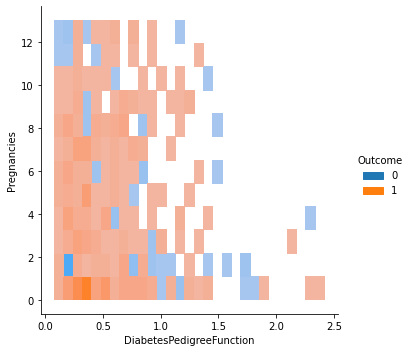

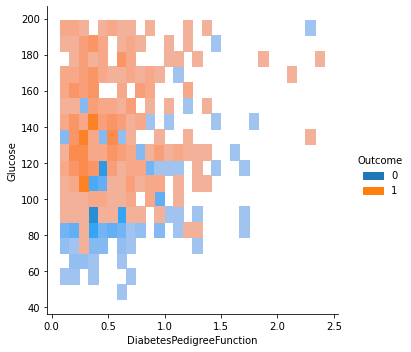

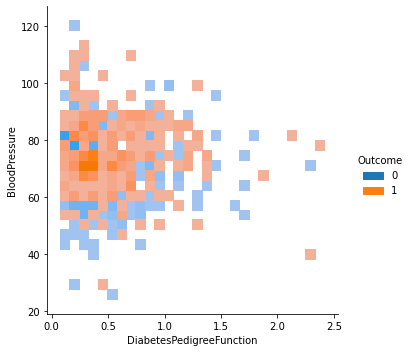

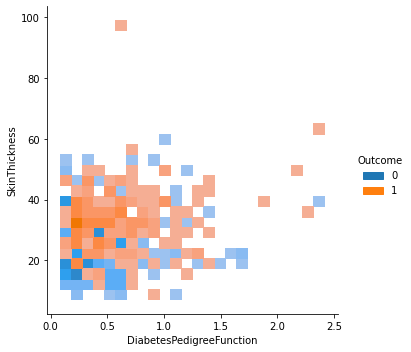

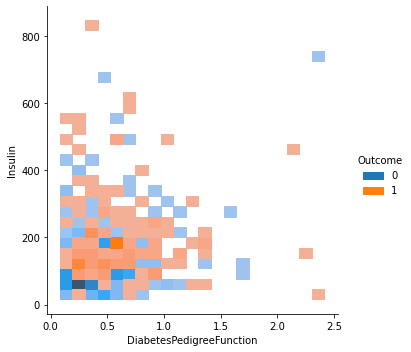

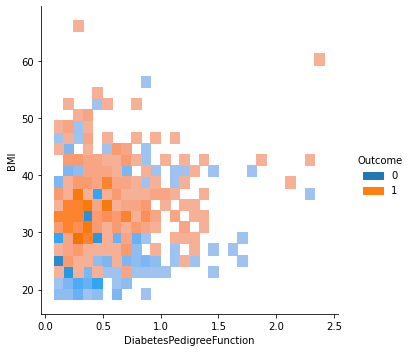

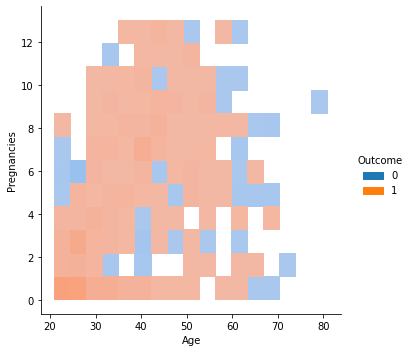

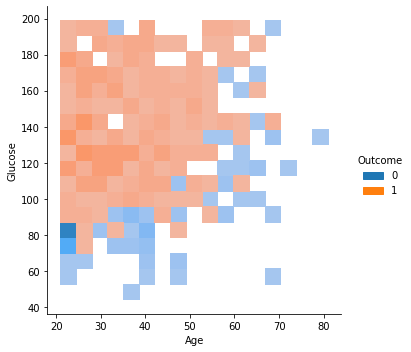

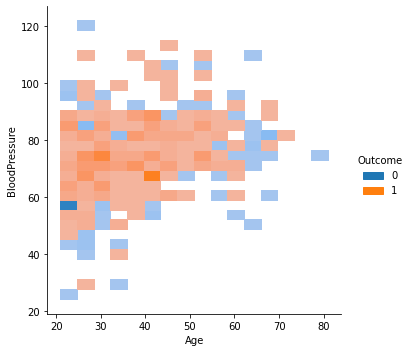

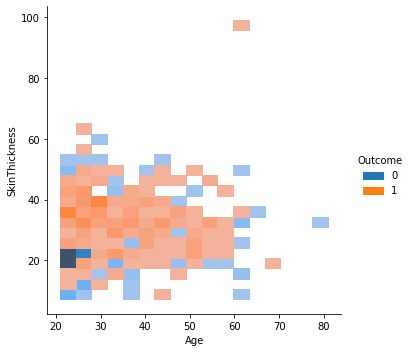

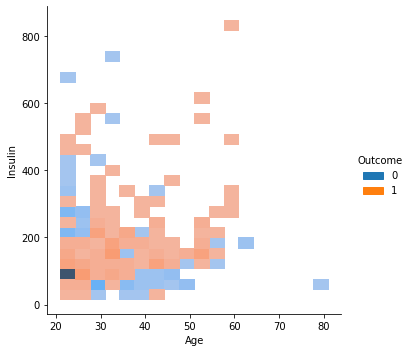

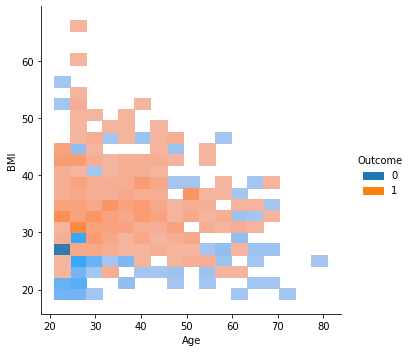

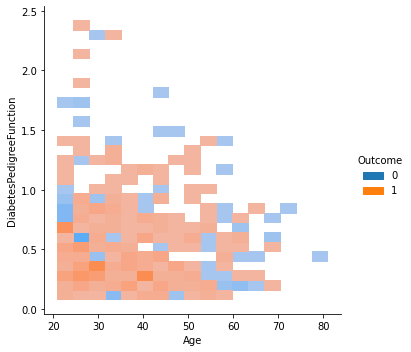

In [ ]:
for i in range(len(df.columns)):
  for j in range(len(df.columns)):
    if(i>j and df.columns[i] != 'Outcome' and df.columns[j] != 'Outcome'):
      sns.displot(df, x=df.columns[i], y= df.columns[j], hue = 'Outcome')
      plt.plot()

The above are the bivariate distribution of features categorized by the diabetis outcome. The distributions doesnt seem to provide any visible differences.

[]

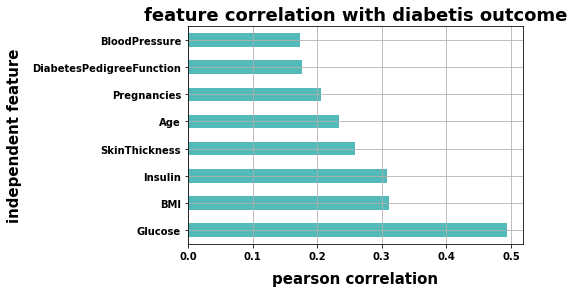

In [ ]:
df.corr()['Outcome'].sort_values(ascending = False).iloc[1:].plot(kind = 'barh',  color = '#54BAB9')
plt.grid('on')
plt.title("feature correlation with diabetis outcome", fontsize=18, weight = 'bold')
plt.xlabel('pearson correlation', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('independent feature', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()

glucose levels, BMI, insuline seems to have relatively more correlation with the outcome. This indicates that dropping these columns as an option to reduce missing values will effect a models predictability. This information helps us to narrow down our data enrichment methods

In [ ]:
corrSeries = df.corr().drop('Outcome').drop('Outcome', axis=1).unstack().sort_values(ascending = False)
print('moderate and strongly correlated independent variables')
print(corrSeries[corrSeries.between(0.3, 0.99)])
print('\nnegative corellations')
print(corrSeries[corrSeries.between(-1, 0)])

moderate and strongly correlated independent variables
BMI            SkinThickness    0.647982
SkinThickness  BMI              0.647982
Glucose        Insulin          0.585315
Insulin        Glucose          0.585315
Age            Pregnancies      0.546169
Pregnancies    Age              0.546169
BloodPressure  Age              0.331131
Age            BloodPressure    0.331131
dtype: float64

negative corellations
DiabetesPedigreeFunction  BloodPressure              -0.003814
BloodPressure             DiabetesPedigreeFunction   -0.003814
DiabetesPedigreeFunction  Pregnancies                -0.031852
Pregnancies               DiabetesPedigreeFunction   -0.031852
dtype: float64


* age is correlated to number of pregnancies
* BMI is correlated to skin thickness
* Insulin levels are correlated to glucose levels

## percentage of missing values per feature

In [ ]:
df.isna().sum()*100/df.shape[0]

Pregnancies                  0.000000
Glucose                      0.654450
BloodPressure                4.581152
SkinThickness               29.712042
Insulin                     48.821990
BMI                          1.439791
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

[]

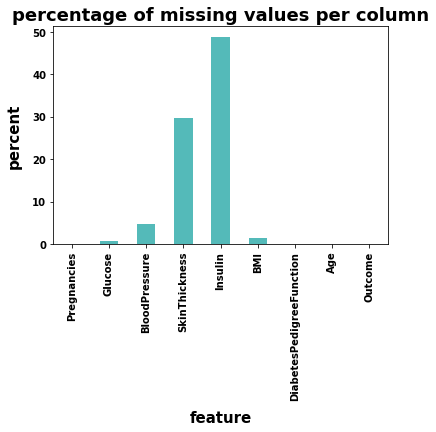

In [ ]:
dfPercent = df.isna().sum()*100/df.shape[0]
dfPercent.plot(kind = 'bar', color = '#54BAB9')

plt.title("percentage of missing values per column", fontsize=18, weight = 'bold')
plt.xlabel('feature', labelpad=10, fontsize=15, weight = 'bold') 
plt.ylabel('percent', labelpad=10, fontsize=15, weight = 'bold')
plt.xticks(fontsize=10,weight = 'bold')
plt.yticks(fontsize=10, weight = 'bold')
plt.plot()

skin-thickness and insuline columns have nearly 50% and 30% of the column values missing.

In [ ]:
print(df.shape)
print(df.dropna().shape)
print(df.drop(axis=1, columns=['Insulin']).dropna().shape)
print(df.drop(axis=1, columns=['Insulin','SkinThickness']).dropna().shape)

(764, 9)
(389, 9)
(528, 8)
(720, 7)


['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] <br>
These columns in my dataset have 0 values for some rows which are absurd. <br>

nearly 50% of values in insulin column and 30% of values in skinthickness column are zeros. <br>
1) if all rows containing 0 values in these columns are dropped the sample size reduces from 768 to 392. <br>
2) Initially droping the column Insulin and then removing rows containing 0 values in these features has reduced sample size from 768 to 532. <br>
3) If both the columns Insulin and skinThickness are dropped first and then rows containing 0 values are removed then the sample size has reduced from 768 to 724.

There is a trade-off between the sample size and number of independent features to have to feed into the learning algorithm.

## To Do
* Explore learning models and evaluate pridictability.
* Before proceeding to Deep-Learning we need to fix the data quality issues discussed earlier

## Issues:
* missing values in features
* Data Imbalance

## possible ways moving forward:

* Impute Missing values ---> train test split ---> overSample minority class ---> scale numerical features --->
 different models ---> evaluate performance




References for data imputation:

[mice_imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)
<br>
[KnnImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)
<br>
[link text](https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87#:~:text=Multivariate%20Imputation%20by%20Chained%20Equation%20%E2%80%94%20MICE&text=MICE%20first%20calculates%20the%20mean,impute%20each%20missing%20value%20sequentially.)

In [ ]:
df_copy = df.copy()

In [ ]:
# defining data pre-processing functions

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf

#KNN-Imputer
def KNNImputedDf(df):
  featureNames = df.columns.tolist()
  imputer = KNNImputer(n_neighbors=50)
  knnImputedArr=imputer.fit_transform(df[featureNames])
  return pd.DataFrame(knnImputedArr, columns=featureNames)

#MICE(Multivariate Imputation by Chained Equation)
def MiceImputedDf(df, initial_strategy='most_frequent'):
  featureNames = df.columns.tolist()
  miceImputer=IterativeImputer(initial_strategy=initial_strategy, missing_values=np.nan)
  return pd.DataFrame(miceImputer.fit_transform(df[featureNames]), columns=featureNames)

#OverSample
def OverSample(X,Y):
  sm = SMOTE(random_state=11)
  return sm.fit_resample(X, Y)

# scaling
def Scale(X_train, X_test):
  featureNames = X_train.columns.tolist()
  scaler = StandardScaler()
  return pd.DataFrame(scaler.fit_transform(X_train), columns=featureNames), pd.DataFrame(scaler.fit_transform(X_test), columns=featureNames)


## **Model1**
* Missing value Imputation (knn imputation)
* train test split (4:1 ratio)
* overSampling (SMOTE)
* scaling  (standard scalar)
* model (2 hidden layers 64, 32)


original dataset size (764, 9)

initial imbalance 
 0    500
1    264
Name: Outcome, dtype: int64

Imputed with knn

 train test split: X_train shape (611, 8) X_test shape: (153, 8)

X_train shape after over sample (818, 8)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                             

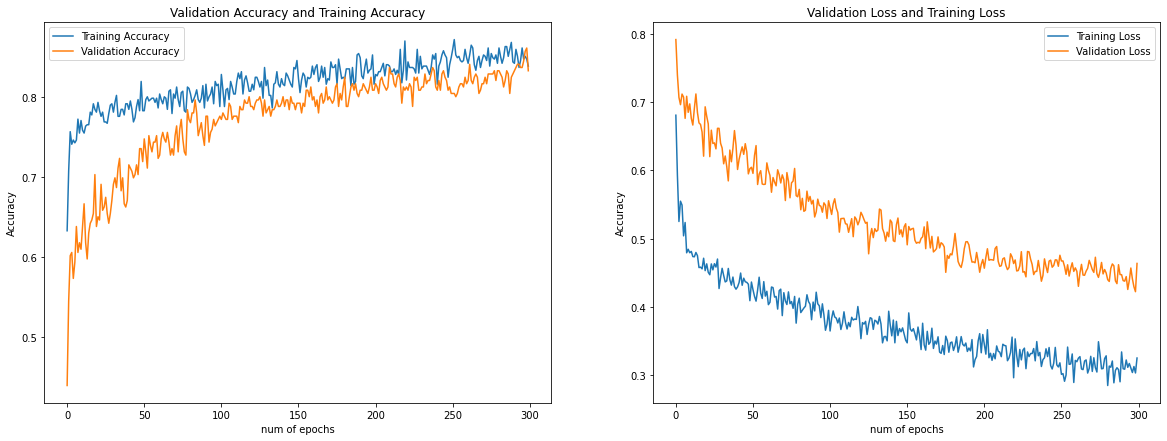

In [ ]:
def buildModel1(x):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=64, activation='relu',  kernel_initializer='he_normal', input_dim=len(x.columns)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
  model.build()  
  print(model.summary())
  return model

df = df_copy.copy() 
print('\noriginal dataset size',df.shape)
y = df['Outcome']
X = df.drop(columns=['Outcome'], axis=1)
print('\ninitial imbalance \n',y.value_counts())
X = KNNImputedDf(X)
print('\nImputed with knn')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, shuffle=True)
print('\n', 'train test split:', 'X_train shape', X_train.shape, 'X_test shape:', X_test.shape)
X_train, y_train = OverSample(X_train, y_train)
print('\nX_train shape after over sample', X_train.shape)
X_train, X_test = Scale(X_train, X_test)


model = buildModel1(X_train)
num_epoches = 300
result = model.fit(X_train, y_train, epochs = num_epoches, validation_split = 0.3, batch_size=5)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nAverage training accuracy = ',np.mean(result.history['accuracy'])) 
print('\nAverage validation accuracy = ',np.mean(result.history['val_accuracy']))
print('\nAverage testing accuracy = ', test_accuracy)


Accuracy, loss = result.history['accuracy'], result.history['loss']
ValidationAcccuracy, validationLoss =  result.history['val_accuracy'], result.history['val_loss']


plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.title('Validation Accuracy and Training Accuracy')
plt.plot(range(num_epoches), Accuracy, label='Training Accuracy')
plt.plot(range(num_epoches), ValidationAcccuracy, label='Validation Accuracy')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Validation Loss and Training Loss')
plt.plot(range(num_epoches), loss, label='Training Loss')
plt.plot(range(num_epoches), validationLoss, label='Validation Loss')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Model2

* Missing value Imputation (knn imputation)
* train test split (4:1 ratio)
* overSampling (SMOTE)
* scaling  (standard scalar)
* model (4 hidden layers 128, 64, 32, 16)


original dataset size (764, 9)

initial imbalance 
 0    500
1    264
Name: Outcome, dtype: int64

Imputed with knn

 train test split: X_train shape (611, 8) X_test shape: (153, 8)

X_train shape after over sample (818, 8)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1152      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                           

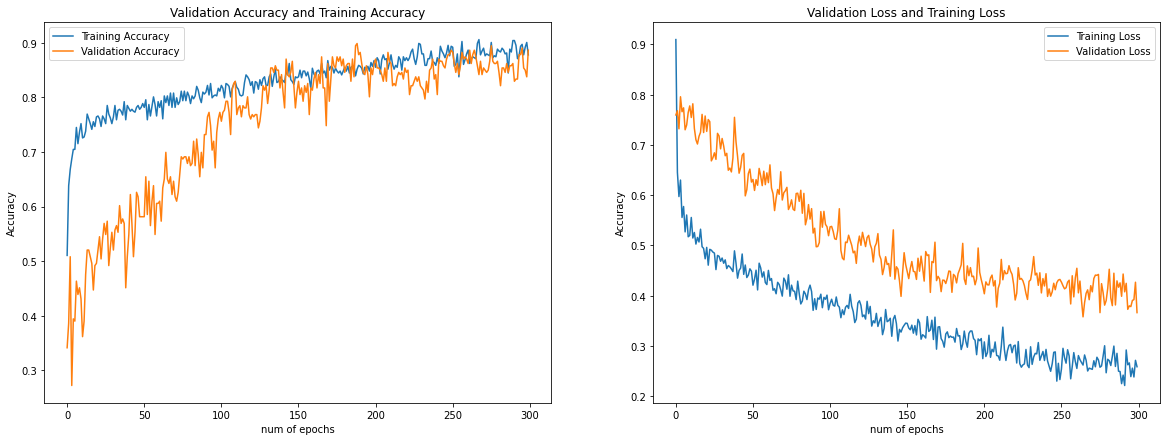

In [ ]:
def buildModel2(x):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=128, activation='relu',  kernel_initializer='he_normal', input_dim=len(x.columns)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
  model.build()  
  print(model.summary())
  return model

df = df_copy.copy() 
print('\noriginal dataset size',df.shape)
y = df['Outcome']
X = df.drop(columns=['Outcome'], axis=1)
print('\ninitial imbalance \n',y.value_counts())
X = KNNImputedDf(X)
print('\nImputed with knn')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, shuffle=True)
print('\n', 'train test split:', 'X_train shape', X_train.shape, 'X_test shape:', X_test.shape)
X_train, y_train = OverSample(X_train, y_train)
print('\nX_train shape after over sample', X_train.shape)
X_train, X_test = Scale(X_train, X_test)


model = buildModel2(X_train)
num_epoches = 300
result = model.fit(X_train, y_train, epochs = num_epoches, validation_split = 0.3, batch_size=5)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nAverage training accuracy = ',np.mean(result.history['accuracy'])) 
print('\nAverage validation accuracy = ',np.mean(result.history['val_accuracy']))
print('\nAverage testing accuracy = ', test_accuracy)


Accuracy, loss = result.history['accuracy'], result.history['loss']
ValidationAcccuracy, validationLoss =  result.history['val_accuracy'], result.history['val_loss']


plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.title('Validation Accuracy and Training Accuracy')
plt.plot(range(num_epoches), Accuracy, label='Training Accuracy')
plt.plot(range(num_epoches), ValidationAcccuracy, label='Validation Accuracy')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Validation Loss and Training Loss')
plt.plot(range(num_epoches), loss, label='Training Loss')
plt.plot(range(num_epoches), validationLoss, label='Validation Loss')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Model3

* Missing value Imputation (knn imputation)
* train test split (4:1 ratio)
* overSampling (SMOTE)
* scaling  (standard scalar)
* model (6 hidden layers 128, 64, 32, 32, 32, 16)




original dataset size (764, 9)

initial imbalance 
 0    500
1    264
Name: Outcome, dtype: int64

Imputed with knn

 train test split: X_train shape (611, 8) X_test shape: (153, 8)

X_train shape after over sample (818, 8)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                           

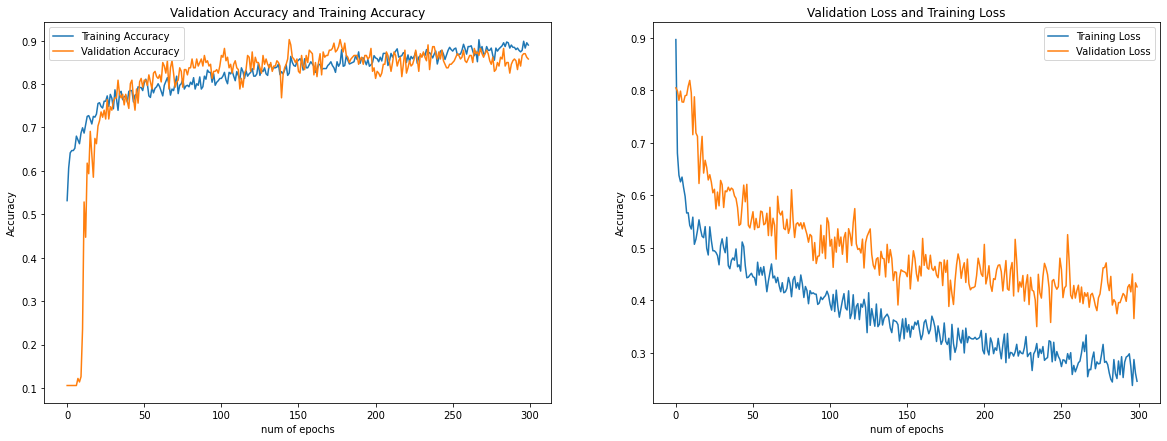

In [ ]:
def buildModel3(x):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=128, activation='relu',  kernel_initializer='he_normal', input_dim=len(x.columns)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
  model.build()  
  print(model.summary())
  return model

df = df_copy.copy() 
print('\noriginal dataset size',df.shape)
y = df['Outcome']
X = df.drop(columns=['Outcome'], axis=1)
print('\ninitial imbalance \n',y.value_counts())
X = KNNImputedDf(X)
print('\nImputed with knn')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, shuffle=True)
print('\n', 'train test split:', 'X_train shape', X_train.shape, 'X_test shape:', X_test.shape)
X_train, y_train = OverSample(X_train, y_train)
print('\nX_train shape after over sample', X_train.shape)
X_train, X_test = Scale(X_train, X_test)


model = buildModel3(X_train)
num_epoches = 300
result = model.fit(X_train, y_train, epochs = num_epoches, validation_split = 0.3, batch_size=5)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nAverage training accuracy = ',np.mean(result.history['accuracy'])) 
print('\nAverage validation accuracy = ',np.mean(result.history['val_accuracy']))
print('\nAverage testing accuracy = ', test_accuracy)


Accuracy, loss = result.history['accuracy'], result.history['loss']
ValidationAcccuracy, validationLoss =  result.history['val_accuracy'], result.history['val_loss']


plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.title('Validation Accuracy and Training Accuracy')
plt.plot(range(num_epoches), Accuracy, label='Training Accuracy')
plt.plot(range(num_epoches), ValidationAcccuracy, label='Validation Accuracy')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Validation Loss and Training Loss')
plt.plot(range(num_epoches), loss, label='Training Loss')
plt.plot(range(num_epoches), validationLoss, label='Validation Loss')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Model4

* Missing value Imputation (MICE imputation)
* train test split (4:1 ratio)
* overSampling (SMOTE)
* scaling  (standard scalar)
* model (2 hidden layers 64, 32)




original dataset size (764, 9)

initial imbalance 
 0    500
1    264
Name: Outcome, dtype: int64

Imputed with knn

 train test split: X_train shape (611, 8) X_test shape: (153, 8)

X_train shape after over sample (818, 8)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                576       
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                           

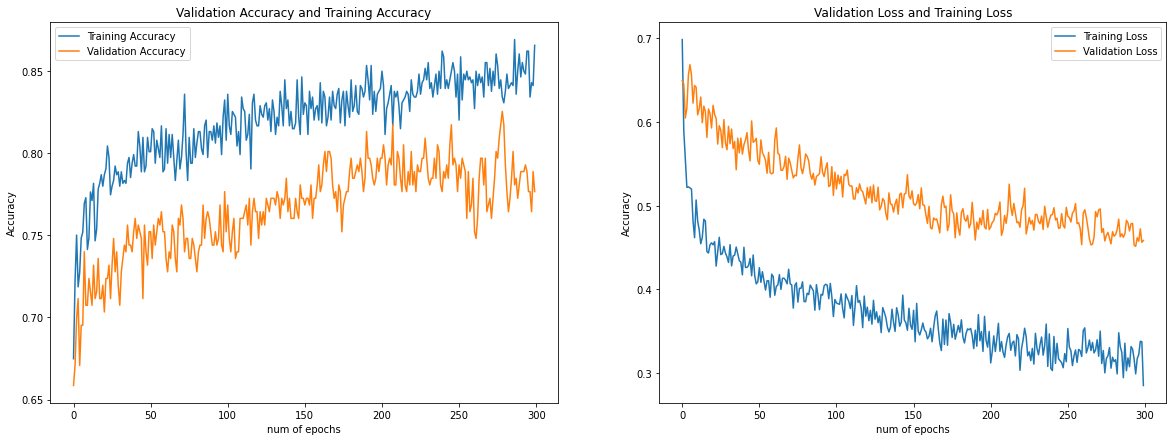

In [ ]:
def buildModel4(x):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=64, activation='relu',  kernel_initializer='he_normal', input_dim=len(x.columns)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
  model.build()  
  print(model.summary())
  return model

df = df_copy.copy() 
print('\noriginal dataset size',df.shape)
y = df['Outcome']
X = df.drop(columns=['Outcome'], axis=1)
print('\ninitial imbalance \n',y.value_counts())
X = MiceImputedDf(X)
print('\nImputed with knn')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, shuffle=True)
print('\n', 'train test split:', 'X_train shape', X_train.shape, 'X_test shape:', X_test.shape)
X_train, y_train = OverSample(X_train, y_train)
print('\nX_train shape after over sample', X_train.shape)
X_train, X_test = Scale(X_train, X_test)


model = buildModel4(X_train)
num_epoches = 300
result = model.fit(X_train, y_train, epochs = num_epoches, validation_split = 0.3, batch_size=5)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nAverage training accuracy = ',np.mean(result.history['accuracy'])) 
print('\nAverage validation accuracy = ',np.mean(result.history['val_accuracy']))
print('\nAverage testing accuracy = ', test_accuracy)


Accuracy, loss = result.history['accuracy'], result.history['loss']
ValidationAcccuracy, validationLoss =  result.history['val_accuracy'], result.history['val_loss']


plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.title('Validation Accuracy and Training Accuracy')
plt.plot(range(num_epoches), Accuracy, label='Training Accuracy')
plt.plot(range(num_epoches), ValidationAcccuracy, label='Validation Accuracy')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Validation Loss and Training Loss')
plt.plot(range(num_epoches), loss, label='Training Loss')
plt.plot(range(num_epoches), validationLoss, label='Validation Loss')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Model5

* Missing value Imputation (MICE imputation)
* train test split (4:1 ratio)
* overSampling (SMOTE)
* scaling  (standard scalar)
* * model (4 hidden layers 128, 64, 32, 16)


original dataset size (764, 9)

initial imbalance 
 0    500
1    264
Name: Outcome, dtype: int64

Imputed with knn

 train test split: X_train shape (611, 8) X_test shape: (153, 8)

X_train shape after over sample (818, 8)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1152      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                           

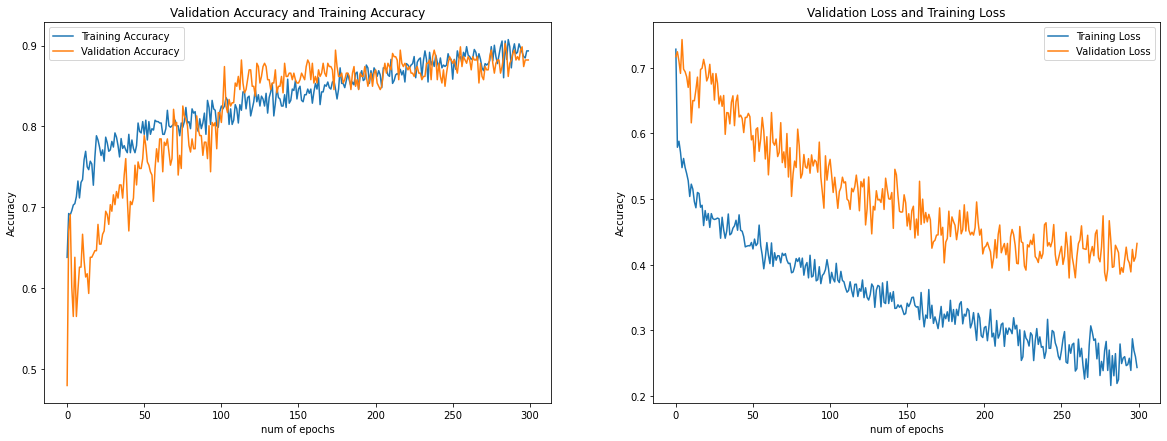

In [ ]:
def buildModel5(x):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=128, activation='relu',  kernel_initializer='he_normal', input_dim=len(x.columns)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
  model.build()  
  print(model.summary())
  return model

df = df_copy.copy() 
print('\noriginal dataset size',df.shape)
y = df['Outcome']
X = df.drop(columns=['Outcome'], axis=1)
print('\ninitial imbalance \n',y.value_counts())
X = MiceImputedDf(X)
print('\nImputed with knn')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, shuffle=True)
print('\n', 'train test split:', 'X_train shape', X_train.shape, 'X_test shape:', X_test.shape)
X_train, y_train = OverSample(X_train, y_train)
print('\nX_train shape after over sample', X_train.shape)
X_train, X_test = Scale(X_train, X_test)


model = buildModel5(X_train)
num_epoches = 300
result = model.fit(X_train, y_train, epochs = num_epoches, validation_split = 0.3, batch_size=5)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nAverage training accuracy = ',np.mean(result.history['accuracy'])) 
print('\nAverage validation accuracy = ',np.mean(result.history['val_accuracy']))
print('\nAverage testing accuracy = ', test_accuracy)


Accuracy, loss = result.history['accuracy'], result.history['loss']
ValidationAcccuracy, validationLoss =  result.history['val_accuracy'], result.history['val_loss']


plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.title('Validation Accuracy and Training Accuracy')
plt.plot(range(num_epoches), Accuracy, label='Training Accuracy')
plt.plot(range(num_epoches), ValidationAcccuracy, label='Validation Accuracy')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Validation Loss and Training Loss')
plt.plot(range(num_epoches), loss, label='Training Loss')
plt.plot(range(num_epoches), validationLoss, label='Validation Loss')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Model6

* Missing value Imputation (MICE imputation)
* train test split (4:1 ratio)
* overSampling (SMOTE)
* scaling  (standard scalar)
* model (6 hidden layers 128, 64, 32, 32, 32, 16)


original dataset size (764, 9)

initial imbalance 
 0    500
1    264
Name: Outcome, dtype: int64

Imputed with knn

 train test split: X_train shape (611, 8) X_test shape: (153, 8)

X_train shape after over sample (818, 8)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               1152      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                           

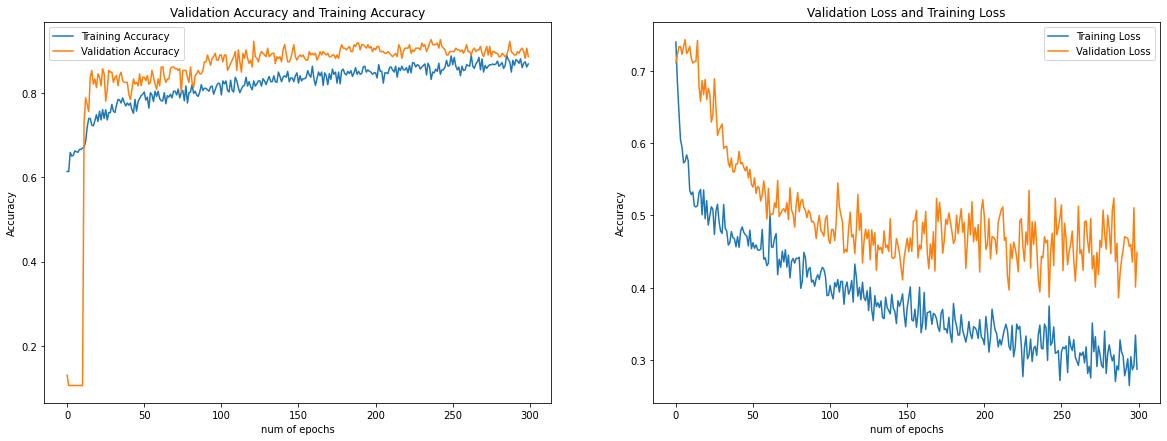

In [ ]:
def buildModel6(x):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=128, activation='relu',  kernel_initializer='he_normal', input_dim=len(x.columns)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
  model.build()  
  print(model.summary())
  return model

df = df_copy.copy() 
print('\noriginal dataset size',df.shape)
y = df['Outcome']
X = df.drop(columns=['Outcome'], axis=1)
print('\ninitial imbalance \n',y.value_counts())
X = MiceImputedDf(X)
print('\nImputed with knn')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, shuffle=True)
print('\n', 'train test split:', 'X_train shape', X_train.shape, 'X_test shape:', X_test.shape)
X_train, y_train = OverSample(X_train, y_train)
print('\nX_train shape after over sample', X_train.shape)
X_train, X_test = Scale(X_train, X_test)


model = buildModel6(X_train)
num_epoches = 300
result = model.fit(X_train, y_train, epochs = num_epoches, validation_split = 0.3, batch_size=5)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nAverage training accuracy = ',np.mean(result.history['accuracy'])) 
print('\nAverage validation accuracy = ',np.mean(result.history['val_accuracy']))
print('\nAverage testing accuracy = ', test_accuracy)


Accuracy, loss = result.history['accuracy'], result.history['loss']
ValidationAcccuracy, validationLoss =  result.history['val_accuracy'], result.history['val_loss']


plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.title('Validation Accuracy and Training Accuracy')
plt.plot(range(num_epoches), Accuracy, label='Training Accuracy')
plt.plot(range(num_epoches), ValidationAcccuracy, label='Validation Accuracy')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Validation Loss and Training Loss')
plt.plot(range(num_epoches), loss, label='Training Loss')
plt.plot(range(num_epoches), validationLoss, label='Validation Loss')
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()